In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
sightings_w_counties = pd.read_pickle("sightings_with_counties.pkl")
sightings_w_features = pd.read_pickle('sightings_add_features.pkl')

In [3]:
sightings_w_features.columns

Index(['Date_Time', 'Shape', 'Duration', 'Summary', 'Posted', 'Detail_Link',
       'Detail_Summary', 'Detail_Summary_nltk', 'Notes', 'Country', 'City',
       'State', 'Location', 'Lat', 'Lon', 'timezone_str', 'Time_UTC',
       'sentiment_Vader', 'sentiment_nltk', 'sentiment_TextBlob',
       'objectivity_TextBlob'],
      dtype='object')

In [4]:
state_abr = {"Hawaii":"HI", "Alaska":"AK", "Washington":"WA", "Oregon":"OR", "California":"CA",
                        "Arizona":"AZ", "Utah":"UT", "Idaho":"ID", "Montana":"MT", "Wyoming":"WY", "Colorado":"CO",
                        "New Mexico":"NM", "Texas":"TX", "Oklahoma":"OK", "Kansas":"KS", "Nebraska":"NE", 
                        "South Dakota":"SD", "North Dakota":"ND", "Minnesota":"MN", "Iowa":"IA", "Missouri":"MO",
                        "Arkansas":"AR", "Louisiana":"LA", "Wisconsin":"WI", "Illinois":"IL", "Mississippi":"MS",
                        "Alabama":"AL", "Georgia":"GA", "Florida":"FL", "Tennessee":"TN", "Kentucky":"KY", "Indiana":"IN",
                        "Michigan":"MI", "South Carolina":"SC", "North Carolina":"NC", "Virginia":"VA",
                        "West Virginia":"WV", "Ohio":"OH", "Pennsylvania":"PA", "Maryland":"MD", "Delaware":"DE",
                        "New Jersey":"NJ", "New York":"NY", "Connecticut":"CT", "Rhode Island":"RI", 
                        "Massachusetts":"MA", "Vermont":"VT", "New Hampshire":"NH", "Maine":"ME",
                        "District of Columbia":"DC", "Nevada":"NV", "Puerto Rico":"PR"}

In [5]:
features = pd.read_pickle("featuresCapstone.pkl")

feature_columns = ['rel0_2007', 'rel1_2007', 'rel2_2007', 'rel3_2007', 'rel4_2007', 'rel5_2007', 'par0_2007', 'par1_2007', 'par2_2007', 'par3_2007', 'rel0_2014', 'rel1_2014', 'rel2_2014', 'rel3_2014', 'rel4_2014', 'rel5_2014', 'par0_2014', 'par1_2014', 'par2_2014', 'par3_2014',]
states = features.state.unique()

for state in states:
    state_abbr = state_abr[state]
    for c in feature_columns:
        # test = features.loc[features.state == state, c].unique()[0]
        sightings_w_features.loc[(sightings_w_features.State == state_abbr), c] = features.loc[features.state == state, c].unique()[0]

validation_cols = feature_columns.copy()
validation_cols.append("State")

states_to_remove = sightings_w_features.loc[sightings_w_features.rel0_2007.isnull()==True, validation_cols].State.unique()
sightings_w_features = sightings_w_features[sightings_w_features.State.isin(states_to_remove)==False]

try:
    sightings_w_features.drop(["Notes"], axis=1, inplace=True)
except:
    print("Column(s) already gone.")
sightings_w_features.isnull().sum()

Date_Time                   0
Shape                       0
Duration                    0
Summary                     0
Posted                      0
Detail_Link                 0
Detail_Summary              0
Detail_Summary_nltk         0
Country                     0
City                        0
State                       0
Location                    0
Lat                         0
Lon                         0
timezone_str                0
Time_UTC                    0
sentiment_Vader             0
sentiment_nltk              0
sentiment_TextBlob          0
objectivity_TextBlob        0
rel0_2007                   0
rel1_2007                   0
rel2_2007                   0
rel3_2007                   0
rel4_2007                 181
rel5_2007                4887
par0_2007                   0
par1_2007                   0
par2_2007                   0
par3_2007                   0
rel0_2014                   0
rel1_2014                   0
rel2_2014                   0
rel3_2014 

In [6]:
for c in feature_columns:
    sightings_w_features.loc[sightings_w_features[c].isnull(), c] = 0

In [7]:
sightings_w_features.isnull().sum()

Date_Time               0
Shape                   0
Duration                0
Summary                 0
Posted                  0
Detail_Link             0
Detail_Summary          0
Detail_Summary_nltk     0
Country                 0
City                    0
State                   0
Location                0
Lat                     0
Lon                     0
timezone_str            0
Time_UTC                0
sentiment_Vader         0
sentiment_nltk          0
sentiment_TextBlob      0
objectivity_TextBlob    0
rel0_2007               0
rel1_2007               0
rel2_2007               0
rel3_2007               0
rel4_2007               0
rel5_2007               0
par0_2007               0
par1_2007               0
par2_2007               0
par3_2007               0
rel0_2014               0
rel1_2014               0
rel2_2014               0
rel3_2014               0
rel4_2014               0
rel5_2014               0
par0_2014               0
par1_2014               0
par2_2014   

In [8]:
sightings_w_features[sightings_w_features.sentiment_nltk.isnull()|sightings_w_features.sentiment_TextBlob.isnull()|sightings_w_features.objectivity_TextBlob.isnull()]

,Date_Time,Shape,Duration,Summary,Posted,Detail_Link,Detail_Summary,Detail_Summary_nltk,Country,City,...,rel0_2014,rel1_2014,rel2_2014,rel3_2014,rel4_2014,rel5_2014,par0_2014,par1_2014,par2_2014,par3_2014


In [9]:
len(sightings_w_features)

60969

In [10]:
from sklearn.preprocessing import LabelEncoder

def encode_state(s):
    return le.transform([s])
    
le = LabelEncoder()

sightings_states = pd.DataFrame()
sightings_states["State"] = sightings_w_features.State.unique()
le.fit(sightings_states["State"])

sightings_w_features["State_num"] = le.transform(sightings_w_features["State"])

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

sightings_w_features["time_num"] = sightings_w_features["Time_UTC"].astype(int)

trans_cols = ["time_num"]

numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])
sightings_w_features[trans_cols] = numeric_transformer.fit_transform(sightings_w_features[trans_cols])

In [12]:
len(sightings_w_counties), len(sightings_w_features)

(61069, 60969)

In [13]:
sightings = sightings_w_features.join(sightings_w_counties[['FIPS', 'County']], how="inner")
len(sightings)

60412

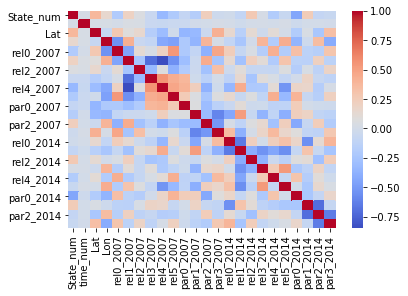

In [14]:
corr_features = ['State_num', 'time_num', 'Lat', 'Lon', 'rel0_2007', 'rel1_2007', 'rel2_2007',
                 'rel3_2007', 'rel4_2007', 'rel5_2007', 
                 'par0_2007', 'par1_2007', 'par2_2007', 'par3_2007', 'rel0_2014', 'rel1_2014', 
                 'rel2_2014', 'rel3_2014', 'rel4_2014', 'rel5_2014', 'par0_2014', 'par1_2014', 
                 'par2_2014', 'par3_2014']
sns.heatmap(sightings[corr_features].corr(), cmap= 'coolwarm');

In [15]:
fileName = 'sightings_merged.pkl'
sightings.to_pickle(fileName)